In [6]:
import  pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv("/content/train.csv")
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [105]:
data1=pd.read_csv('/content/test.csv')
data1.head(10)


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [9]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

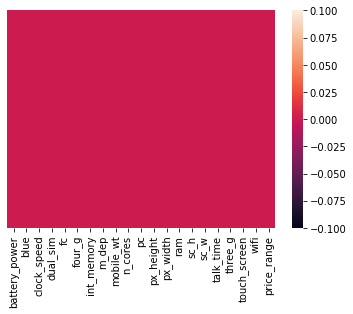

In [12]:
sns.heatmap(data.isnull(),yticklabels=False)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [93]:
print(data.price_range.unique())
data.shape

[1 2 3 0]


(2000, 21)

In [94]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [8.050e+02, 1.000e+00, 7.000e-01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [9.110e+02, 1.000e+00, 2.900e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.180e+02, 1.000e+00, 1.600e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.523e+03, 1.000e+00, 1.800e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.522e+03, 1.000e+00, 7.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [96]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)
reg=LogisticRegression()
reg.fit(X_train,y_train)
print("training completed")
X_train



training completed


array([[-0.93181622, -0.99128795,  0.84170801, ..., -1.75545796,
        -1.02020406,  0.98634324],
       [-1.01674706,  1.00878862, -0.99558096, ..., -1.75545796,
         0.98019606,  0.98634324],
       [-0.77343166,  1.00878862,  1.69910954, ..., -1.75545796,
         0.98019606, -1.01384584],
       ...,
       [-1.21644933,  1.00878862,  0.10679242, ...,  0.56965192,
         0.98019606,  0.98634324],
       [ 0.63137047,  1.00878862,  0.35176429, ...,  0.56965192,
         0.98019606, -1.01384584],
       [ 0.62907504,  1.00878862, -0.99558096, ...,  0.56965192,
        -1.02020406,  0.98634324]])

In [97]:
y_pred=reg.predict(X_test)
y_pred
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,2,2
...,...,...
395,2,2
396,3,3
397,3,3
398,1,1


In [98]:

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.04


In [99]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.9675693205772661


In [112]:
x=data1.iloc[:,1:].values
x=s.fit_transform(x)
y2=reg.predict(x)
data1['Price']=y2


In [113]:
data1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2
